In [8]:
import os
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
proc_path=os.path.join(os.path.pardir,'data','processed','processed_data.csv')
df=pd.read_csv(proc_path,index_col=0)

In [9]:
df.head()

,Age,Pclass,Survived,Fare_Class,IsAdult,IsMother,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir
0,22.0,3,0,0,1,0,2,0,0,1,0,1,0,0,0,1,0,0,0
1,38.0,1,1,4,1,0,2,1,0,0,1,0,0,0,0,0,1,0,0
2,26.0,3,1,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0
3,35.0,1,1,4,1,0,2,0,0,1,1,0,0,0,0,0,1,0,0
4,35.0,3,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0


In [10]:
df_test=df[df.Survived==-999].copy()
df_train=df[df.Survived!=-999].copy()

In [11]:
df_test.drop(['Survived'],axis=1,inplace=True)

In [15]:
df_train=df_train[['Age', 'Pclass',  'Fare_Class', 'IsAdult', 'IsMother',\
       'FamilySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',\
       'Sex_male', 'Title_Lady', 'Title_Master', 'Title_Miss', 'Title_Mr',\
       'Title_Mrs', 'Title_Officer', 'Title_Sir','Survived']]

In [19]:
df_train.head()

,Age,Pclass,Fare_Class,IsAdult,IsMother,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,Survived
0,22.0,3,0,1,0,2,0,0,1,0,1,0,0,0,1,0,0,0,0
1,38.0,1,4,1,0,2,1,0,0,1,0,0,0,0,0,1,0,0,1
2,26.0,3,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1
3,35.0,1,4,1,0,2,0,0,1,1,0,0,0,0,0,1,0,0,1
4,35.0,3,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0


In [21]:
df_test.head()

,Age,Pclass,Fare_Class,IsAdult,IsMother,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir
0,34.5,3,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1,47.0,3,0,1,0,2,0,0,1,1,0,0,0,0,0,1,0,0
2,62.0,2,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0
3,27.0,3,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0
4,22.0,3,2,1,1,3,0,0,1,1,0,0,0,0,0,1,0,0


In [20]:
X=df_train.iloc[:,:-1].values
y=df_train.iloc[:,-1].values
X_test=df_test.values

In [22]:
X

array([[22.,  3.,  0., ...,  0.,  0.,  0.],
       [38.,  1.,  4., ...,  1.,  0.,  0.],
       [26.,  3.,  1., ...,  0.,  0.,  0.],
       ...,
       [22.,  3.,  3., ...,  0.,  0.,  0.],
       [26.,  1.,  3., ...,  0.,  0.,  0.],
       [32.,  3.,  0., ...,  0.,  0.,  0.]])

In [24]:
def train_test_split(X,y,size=0.8,rs=None):
    N=len(X)
    np.random.seed(rs)
    tr_i=np.random.choice(N,int(size*N),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_train=X[tr_i]
    y_train=y[tr_i]
    X_test=X[t_i]
    y_test=y[t_i]
    return X_train,y_train,X_test,y_test

In [23]:
import tensorflow as tf

C:\Users\ya391860\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [115]:
class LogisticTF(object):
    def __init__(self):
        pass
    def forward(self,X):
        return tf.sigmoid(tf.tensordot(X,self.W,axes=1)+self.b)
    def predict(self,X):
        p=self.forward(X)
        return tf.round(p)
    def score(self,y,y_p):
        return np.mean(y==y_p)
    def fit(self,X,y,lr=0.1,epochs=5000,fig=True,random_state=None,batch_size=100,mu=0.95,decay=0.999,epsilon=1e-8):
        X_t,y_t,X_v,y_v=train_test_split(X,y,size=0.9,rs=random_state)
        self.W=tf.Variable(tf.random_normal(seed=random_state,stddev=np.sqrt(X.shape[1]),shape=(X.shape[1],)))
        self.b=tf.Variable(tf.random_normal(shape=(1,),seed=random_state))
        tfX=tf.placeholder(name='X',shape=(None,X.shape[1]),dtype=tf.float32)
        tfY=tf.placeholder(name='y',shape=(None,),dtype=tf.float32)
        c_t=[]
        c_v=[]
        cl_t=[]
        cl_v=[]
        y_p=self.forward(tfX)
        cost=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tfY,logits=y_p))
        preds=self.predict(tfX)
        optimizer=tf.train.RMSPropOptimizer(lr,decay=decay,momentum=mu,epsilon=epsilon)
        train=optimizer.minimize(cost)
        with tf.Session() as s:
            s.run(tf.global_variables_initializer())
            for i in range(epochs):
                c_t.append(s.run(cost,feed_dict={tfX:X_t,tfY:y_t}))
                c_v.append(s.run(cost,feed_dict={tfX:X_v,tfY:y_v}))
                cl_t.append(self.score(y_t,s.run(preds,feed_dict={tfX:X_t})))
                cl_v.append(self.score(y_v,s.run(preds,feed_dict={tfX:X_v})))
                s.run(train,feed_dict={tfX:X_t,tfY:y_t})
                if i % 10 ==0:
                    print('Epoch {0} Train C: {1} Cl: {2} Test C: {3} Cl:{4}'.format(i,c_t[i],cl_t[i],c_v[i],cl_v[i]))

        if fig==True:
            plt.plot(c_t,label='Train Cost')
            plt.plot(c_v,label='Test Cost')
            plt.legend()
            plt.show()
            plt.plot(cl_t,label='Train Classification')
            plt.plot(cl_v,label='Test Classification')
            plt.legend()
            plt.show()

In [116]:
lg=LogisticTF()

Epoch 0 Train C: 0.8827325105667114 Cl: 0.3970037453183521 Test C: 0.8532940149307251 Cl:0.45555555555555555
Epoch 10 Train C: 0.774118185043335 Cl: 0.5218476903870163 Test C: 0.7616761922836304 Cl:0.5444444444444444
Epoch 20 Train C: 0.6926519274711609 Cl: 0.616729088639201 Test C: 0.6882500648498535 Cl:0.6222222222222222
Epoch 30 Train C: 0.6927490830421448 Cl: 0.616729088639201 Test C: 0.6924018859863281 Cl:0.6111111111111112
Epoch 40 Train C: 0.6927648782730103 Cl: 0.616729088639201 Test C: 0.6928686499595642 Cl:0.6111111111111112
Epoch 50 Train C: 0.6927641034126282 Cl: 0.616729088639201 Test C: 0.6929483413696289 Cl:0.6111111111111112
Epoch 60 Train C: 0.6927550435066223 Cl: 0.616729088639201 Test C: 0.6929596662521362 Cl:0.6111111111111112
Epoch 70 Train C: 0.6927370429039001 Cl: 0.616729088639201 Test C: 0.6929435133934021 Cl:0.6111111111111112
Epoch 80 Train C: 0.6927052736282349 Cl: 0.616729088639201 Test C: 0.692899763584137 Cl:0.6111111111111112
Epoch 90 Train C: 0.69265025

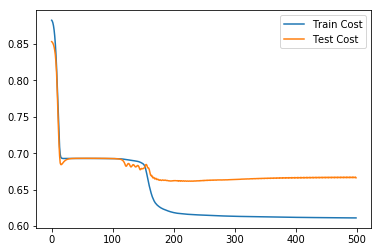

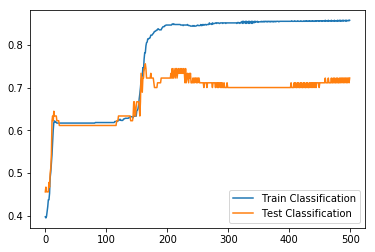

In [119]:
lg.fit(X,y,lr=0.01,mu=0.9,decay=0.9,epochs=500,random_state=100)